# 03 - Naive Bayes Classification

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

In [2]:
# Load preprocessed dataset
df = pd.read_csv("../data/processed_fraud.csv")

# Define features and label
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [3]:
# Predict and evaluate
y_pred = nb.predict(X_test)
y_proba = nb.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.03      0.16      0.06      1643

    accuracy                           0.99   1272524
   macro avg       0.52      0.58      0.53   1272524
weighted avg       1.00      0.99      1.00   1272524

Confusion Matrix:
 [[1263473    7408]
 [   1377     266]]
ROC AUC: 0.8074997681948395


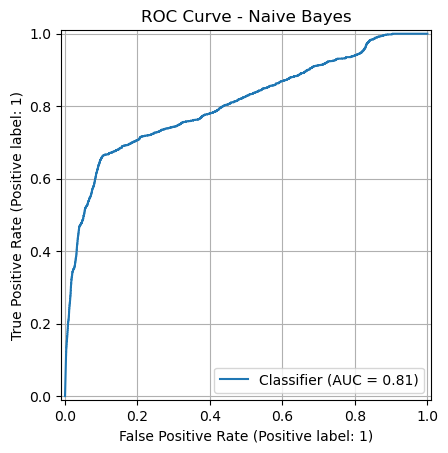

In [4]:
# ROC and PR curves
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Naive Bayes")
plt.grid()
plt.show()

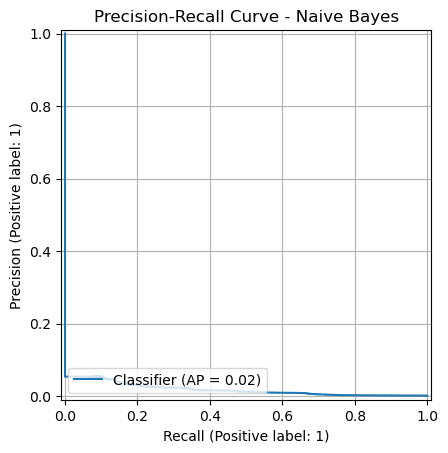

In [5]:
PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Precision-Recall Curve - Naive Bayes")
plt.grid()
plt.show()